In [115]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
#uploading the dataset
data = pd.read_csv("C:/Users/reshm/Documents/ISB/Statistical analysis/SA1_Group_11.csv")

C:\Users\reshm\AppData\Local\Temp\ipykernel_5892\2746907223.py:2: DtypeWarning: Columns (1,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/reshm/Documents/ISB/Statistical analysis/SA1_Group_11.csv")


## Q1.

    95 percent confidence interval for the “Gross output – Year 3 (Rs)"

In [9]:
#minimum and maximum values in GOP_Year3 variable
min(data['GOP_Year3']), max(data['GOP_Year3'])

(0.0, 908105000000.0)

C:\Users\reshm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GOP_Year3', ylabel='Density'>

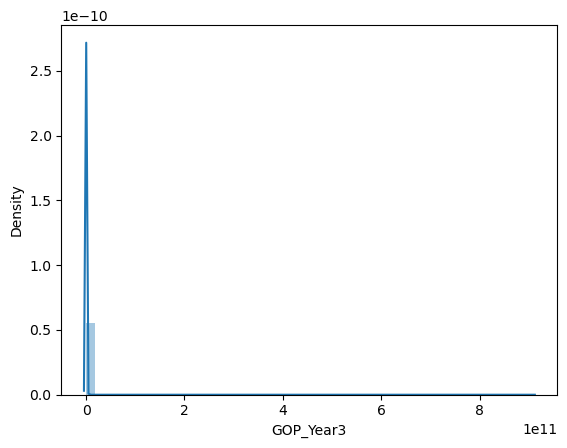

In [37]:
import seaborn as sns
sns.distplot(data['GOP_Year3'])

In [39]:
#First and third Quartiles of the GOP_Year3 variable and the Inter Quartiles Range
q25, q75 = np.percentile(data['GOP_Year3'], 25), np.percentile(data['GOP_Year3'], 75)
iqr = q75 - q25
print(q25, q75)
print(iqr)

46500.0 378500.0
332000.0


In [40]:
# Data less than and greater than Q2 and Q3 by 1.5*IQR are considered outliers
# 1660 records identified as outliers

lower, upper = q25-iqr*1.5, q75+iqr*1.5
outliers = [x for x in data['GOP_Year3'] if x < lower or x > upper]

In [41]:
final_data = [x for x in data['GOP_Year3'] if x > lower and x < upper]

In [42]:
len(final_data) #8340 useful records
min(final_data), max(final_data)

(0.0, 875000.0)

C:\Users\reshm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

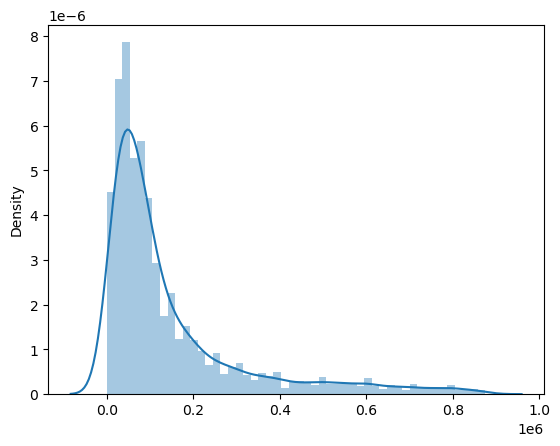

In [43]:
sns.distplot(final_data)

In [44]:
GOP = pd.DataFrame(final_data)

In [46]:
# Let mu be the sample mean and sigma_s be the sample standard deviation
mu = GOP.mean()
sigma_s = GOP.std()
print(mu)
print(sigma_s)

0    145247.327458
dtype: float64
0    170349.027353
dtype: float64


In [54]:
## As we are consider the data as a sample, we don't know the population standard deviation. 
## We will estimate sample standard deviation to calculate the Confidence Interval using t distribution.
## Degrees of freedom (df) and t value 
df = 8340 - 1
print("degress of freedom is", df)
t_value = 1.9602    ### same as Z value as the df is very high
print("t_value at 5% significance level is", t_value)

degress of freedom is 8339
t_value at 5% significance level is 1.9602


In [58]:
## Confidence Interval estimation 
## CI = (mu - t_value*sample_s/sqrt(n), mu + t_value*sample_s/sqrt(n))

CI_lower_limit = (mu-t_value*sigma_s/np.sqrt(8340))
CI_upper_limit = (mu+t_value*sigma_s/np.sqrt(8340))

print(CI_lower_limit, CI_upper_limit)

0    141590.680297
dtype: float64 0    148903.974619
dtype: float64


The dataset had outliers that caused skewness in the distribution, hence we removed them. The inter quartile range(IQR) is Rs.3,32,000. There is wide spread in the data, owing to the hetergenous industry units and varying Gross Output amounts.
Sample mean is Rs.145247.33
Sample standard deviation is Rs.170349.03
95% Confidence Interval of mean of 'Gross Output Year 3' is (141590.89, 148903.76), which means there is 95% probability that the population mean of Gross Output Amount lies between Rs.141590.89 and Rs.148903.76.

## Q2.
      Define two different measures that you consider most appropriate for measuring the performance of the units.


    a) We consider the Net_Year3 metrics, as this is the difference between the physical assets like plant, machinery, buildings etc. and the liabilities like bank loans. It helps to measure the financial strength of a company over a period of time, three years is a decent time period to judge the same.

    b) Second variable we consider is the Year-on-year Gross Output. Gross output is the revenue earned from sales or production of the industrial unit and hence a direct measure of performance. The change from previous period gives an understanding about the rate of growth of the company.

In [105]:
#Set the empty sting values in the column data['GOP_Year2'] to 0
data.loc[data['GOP_Year2'] == ' ', 'GOP_Year2'] = 0 

#Convert the column type to float
data['GOP_Year2'] = data['GOP_Year2'].astype('float')


#Derive the new column YoY Gross Output
data['YoY_GOP'] = round((data['GOP_Year3']-data['GOP_Year2'])*100/data['GOP_Year2'],2)

#Handling the inf values
data.loc[~np.isfinite(data['YoY_GOP']), 'YoY_GOP'] = np.nan

data['YoY_GOP'].describe()

count     9951.000000
mean        39.001901
std        859.933819
min       -100.000000
25%         -2.040000
50%          7.140000
75%         16.670000
max      60050.000000
Name: YoY_GOP, dtype: float64

## Q3.

In [102]:
#minimum and maximum values in NET_Year3 variable
print(min(data['NET_Year3']), max(data['NET_Year3']))
print('As there are extreme values in the variable, we remove the outliers')

#First and third Quartiles of the NET_Year3 variable and the Inter Quartiles Range
print('Confidence Interval analysis for the Net Worth Measure')
qr25, qr75 = np.percentile(data['NET_Year3'], 25), np.percentile(data['NET_Year3'], 75)
iqr1 = qr75 - qr25
print('1st and 3rd Quartiles =',qr25, qr75)
print('Inter Quartile Range =',iqr1)


# Data less than and greater than Q2 and Q3 by 1.5*IQR are considered outliers
# 1660 records identified as outliers
lower1, upper1 = qr25-iqr1*1.5, qr75+iqr1*1.5
outliers1 = [x for x in data['NET_Year3'] if x < lower1 or x > upper1]


Net_data = [x for x in data['NET_Year3'] if x > lower1 and x < upper1]

print('Number of Units',len(Net_data)) #8572 useful records
print(min(Net_data), max(Net_data))

NET_Worth = pd.DataFrame(Net_data)

# Let Net_mu be the sample mean and Net_sigma_s be the sample standard deviation
Net_mu = NET_Worth.mean()
Net_sigma_s = NET_Worth.std()
print('Mean =', Net_mu)
print('Standard dev =', Net_sigma_s)

-3525778 660945466
As there are extreme values in the variable, we remove the outliers
Confidence Interval analysis for the Net Worth Measure
1st and 3rd Quartiles = 54862.5 520000.0
Inter Quartile Range = 465137.5
Number of Units 8572
-87250 1212500
Mean = 0    221608.015282
dtype: float64
Standard dev = 0    258882.387955
dtype: float64


In [97]:
## As we are consider the data as a sample, we don't know the population standard deviation. 
## We will estimate sample standard deviation to calculate the Confidence Interval using t distribution.
## Degrees of freedom (df) and t value 
df1 = 8572 - 1
print("degress of freedom =", df1)
t_value1 = 2.576    ### same as Z value as the df is very high
print("t_value at 1% significance level =", t_value1)

## Confidence Interval estimation 
## CI = (mu - t_value*sample_s/sqrt(n), mu + t_value*sample_s/sqrt(n))

CI_lower_limit1 = (Net_mu-t_value1*Net_sigma_s/np.sqrt(8572))
CI_upper_limit1 = (Net_mu+t_value1*Net_sigma_s/np.sqrt(8572))

print('The Confidence Interval at 99% confidence level is', CI_lower_limit1, ',',CI_upper_limit1)

degress of freedom = 8571
t_value at 1% significance level = 2.576
The Confidence Interval at 99% confidence level is 0    214405.116973
dtype: float64 , 0    228810.913591
dtype: float64


      The dataset had outliers that caused skewness in the distribution, hence we removed them. The inter quartile range(IQR) is Rs.465137.5. There is wide spread in the data, owing to the hetergenous industry units and varying Gross Output amounts. Sample mean is Rs.221608.015 Sample standard deviation is Rs.258882.39.
    95% Confidence Interval of mean of 'Gross Output Year 3' is (141590.89, 148903.76), which means there is 95% probability that the population mean of Gross Output Amount lies between Rs.141590.89 and Rs.148903.76.

In [83]:
print('Confidence Interval analysis for the YoY Gross Output Measure')

# Let yoy_mu be the sample mean and yoy_sigma_s be the sample standard deviation
yoy_mu = data['YoY_GOP'].mean()
yoy_sigma_s = data['YoY_GOP'].std()
print('Mean =', yoy_mu)
print('Sample Standard_dev =', yoy_sigma_s)

Confidence Interval analysis for the YoY Gross Output Measure
Mean = 39.00190131645061
Sample Standard_dev = 859.9338193244829


In [138]:
## As we are consider the data as a sample, we don't know the population standard deviation. 
## We will estimate sample standard deviation to calculate the Confidence Interval using t distribution.
## Degrees of freedom (df) and t value 
df2 = 10000 - 1
print("degress of freedom is", df2)
t_value2 = 2.576    ### same as Z value as the df is very high
print("t_value at 1% significance level is", t_value2)

## Confidence Interval estimation 
## CI = (mu - t_value*sample_s/sqrt(n), mu + t_value*sample_s/sqrt(n))

CI_lower_limit2 = (yoy_mu-t_value2*yoy_sigma_s/np.sqrt(10000))
CI_upper_limit2 = (yoy_mu+t_value2*yoy_sigma_s/np.sqrt(10000))

print('The Confidence Interval at 99% confidence level is between', CI_lower_limit2, 'to' ,CI_upper_limit2)

degress of freedom is 9999
t_value at 1% significance level is 2.576
The Confidence Interval at 99% confidence level is between 16.850006130651934 to 61.15379650224929


    There is wide spread in the data, owing to the hetergenous industry units and varying Gross Output amounts. Sample mean Rs.39 Sample standard deviation is Rs.860.
    95% Confidence Interval of mean of 'Gross Output Year 3' is (16.85, 61.15), which means there is 95% probability that the population mean of Year On Year Gross Output Amount lies between Rs.15.07 and Rs.62.93.

## Q8.
     
     

    In order to compare the performance of the two categories of the Units, we need to compare the means of the two samples, using the two tailed t-test. Let μ1 be the mean of SSSBE units and μ2 be the mena of SSI units. The hypothesis for the analysis would be:
    Null Hypothesis - H0:  μ1 = μ2
    Alternate Hypothesis - Ha:  μ1 ≠ μ2

In [81]:
# filtering data by UNIT_TYPE
SSSBE = data[data["UNIT_TYPE"] == 2]
SSI = data[data["UNIT_TYPE"] == 1]

filtered_SSSBE = filtered_data[filtered_data["UNIT_TYPE"] == 2]
filtered_SSI = filtered_data[filtered_data["UNIT_TYPE"] == 1]

# run a two-sample t-test on the filtered data
t_stat_NET, p_value_NET = ttest_ind(filtered_SSSBE['NET_Year3'], filtered_SSI["NET_Year3"], equal_var=False)

# print the results
print("NET_Year3 two-sample t-test results:")
print("t-statistic: ", t_stat_NET)
print("p-value: ", p_value_NET*2)

NET_Year3 two-sample t-test results:
t-statistic:  -9.865923801478562
p-value:  1.506785096817009e-22


    The t-statistic measures the difference between the two categories of Unit types (SSSBE and SSI) in terms of the standard error of the difference. For the NET_Year3 two-sample t-test, the calculated t-statistic is -9.86, which indicates there is huge difference in the two samples.

    Significance level of 0.05
    Critical value = 1.9673
    t-statistics = 9.86
    Therefore, as the t-statistics > critical value, we reject the null and conclude that the means of the two samples are different.

    The p-value is a measure of the evidence against the null hypothesis. In this case, the calculated p-value is 1.5e-22, which is very small compared to 0.05. This indicates strong evidence against the null hypothesis, suggesting that there is a significant difference in NET_Year3 (Net worth in the 3rd year) performance between SSSBE and SSI.

In [65]:
from scipy.stats import ttest_ind
# filtering data by UNIT_TYPE
SSSBE = data[data["UNIT_TYPE"] == 2]
SSI = data[data["UNIT_TYPE"] == 1]

# filtering out the outliers
filtered_data = data[(data['YoY_GOP'] >= lower_bound) & (data['YoY_GOP'] <= upper_bound)]

# creating new variables for the filtered data
filtered_SSSBE = filtered_data[filtered_data["UNIT_TYPE"] == 2]
filtered_SSI = filtered_data[filtered_data["UNIT_TYPE"] == 1]

# run a two-sample t-test on the filtered data
t_stat_NET, p_value_NET = ttest_ind(filtered_SSSBE['YoY_GOP'], filtered_SSI["YoY_GOP"], equal_var=False)

# print the results
print("NET_Year3 two-sample t-test results:")
print("t-statistic: ", t_stat_NET)
print("p-value: ", round((p_value_NET*2),2)


NET_Year3 two-sample t-test results:
t-statistic:  1.9314415823950357
p-value:  0.05355742701772538


    For the YoY_GOP two-sample t-test, the calculated t-statistic is 1.93, which no difference bewteen the two samples.

    Significance level of 0.05
    Critical value = 1.9673
    t-statistics = 1.931
    Therefore, as the t-statistics < critical value, we accept the null and conclude that the means of the two samples are not different.

    In this case, the calculated p-value is 0.053, which is greater than 0.05. This indicates strong evidence against the null hypothesis, suggesting that there is no difference in YoY_GOP (Year-On_Year Gross Output) between SSSBE and SSI.

## Q9.

In [73]:
# Filter data by UNIT_TYPE
SSSBE = data[data["UNIT_TYPE"] == 2]
SSI = data[data["UNIT_TYPE"] == 1]

# Calculate the average of the performance measure for SSI and SSSBE separately
avg_perf_SSI = SSI["NET_Year3"].mean()
avg_perf_SSSBE = SSSBE["NET_Year3"].mean()

# Define a better performing SSI unit as a unit whose performance is greater than the average of SSI units
better_SSI = SSI[SSI["NET_Year3"] > avg_perf_SSI]

# Calculate the proportion of better performing SSI units
prop_better_SSI = len(better_SSI) / len(SSI)

    Filtering the data based on Industry type and saving their mean values to find out the performance of individual SSI units within NET_Year3. 

In [74]:
# Define a better performing SSSBE unit as a unit whose performance is greater than the average of SSSBE units
better_SSSBE = SSSBE[SSSBE["NET_Year3"] > avg_perf_SSSBE]

# Calculate the proportion of better performing SSSBE units
prop_better_SSSBE = len(better_SSSBE) / len(SSSBE)

from scipy.stats import chi2_contingency

# Create a 2x2 contingency table of the better performing and worse performing units in SSI and SSSBE
cont_table = pd.DataFrame({
    "Better Performing": [len(better_SSI), len(better_SSSBE)],
    "Worse Performing": [len(SSI) - len(better_SSI), len(SSSBE) - len(better_SSSBE)]
}, index=["SSI", "SSSBE"])

# Perform a chi-square test with 1 degree of freedom
chi2_stat, p_val, dof, expected = chi2_contingency(cont_table)

# Print the results
if p_val < 0.05:
    if chi2_stat > 0:
        print("There is a significant difference in the proportion of better performing units in SSI and SSSBE on NET_Year3.")
        if prop_better_SSI > prop_better_SSSBE:
            print("SSI has a higher proportion of better performing units than SSSBE on NET_Year3.")
        else:
            print("SSSBE has a higher proportion of better performing units than SSI on NET_Year3.")
    else:
        print("There is a significant difference in the proportion of worse performing units in SSI and SSSBE on NET_Year3.")
else:
    print("There is no significant difference in the proportion of better performing units in SSI and SSSBE on NET_Year3.")

There is no significant difference in the proportion of better performing units in SSI and SSSBE on NET_Year3.


    Creating a contingency table for better and worse performing units and performing a chi-squre test with 1 degree of freedom

In [77]:
# Calculate the average of the second performance measure for SSI and SSSBE separately
avg_perf2_SSI = SSI["YoY_GOP"].mean()
avg_perf2_SSSBE = SSSBE["YoY_GOP"].mean()

# Filter data by UNIT_TYPE
SSSBE = data[data["UNIT_TYPE"] == 2]
SSI = data[data["UNIT_TYPE"] == 1]

# Calculate the average of the performance measure for SSI and SSSBE separately
avg_perf_SSI = SSI["YoY_GOP"].mean()
avg_perf_SSSBE = SSSBE["YoY_GOP"].mean()

    Saving their mean values to find out the performance of individual SSI units within YoY_GOP. 

In [78]:
# Define a better performing SSI unit as a unit whose performance on the second measure is greater than the average of SSI units
better2_SSI = SSI[SSI["YoY_GOP"] > avg_perf2_SSI]

# Calculate the proportion of better performing SSI units
prop_better2_SSI = len(better2_SSI) / len(SSI)

# Define a better performing SSSBE unit as a unit whose performance on the second measure is greater than the average of SSSBE units
better2_SSSBE = SSSBE[SSSBE["YoY_GOP"] > avg_perf2_SSSBE]

# Calculate the proportion of better performing SSSBE units
prop_better2_SSSBE = len(better2_SSSBE) / len(SSSBE)

    Defining better and worse performance units according to the performance measures mentioned

In [79]:
# Create a 2x2 contingency table of the better performing and worse performing units in SSI and SSSBE
cont_table2 = pd.DataFrame({
    "Better Performing": [len(better2_SSI), len(better2_SSSBE)],
    "Worse Performing": [len(SSI) - len(better2_SSI), len(SSSBE) - len(better2_SSSBE)]
}, index=["SSI", "SSSBE"])

# Perform a chi-square test with 1 degree of freedom
chi2_stat2, p_val2, dof2, expected2 = chi2_contingency(cont_table2)

# Print the results
if p_val2 < 0.05:
    if chi2_stat2 > 0:
        print("There is a significant difference in the proportion of better performing units in SSI and SSSBE on the YoY_GOP.")
        if prop_better2_SSI > prop_better2_SSSBE:
            print("SSI has a higher proportion of better performing units than SSSBE on the YoY_GOP.")
        else:
            print("SSSBE has a higher proportion of better performing units than SSI on the YoY_GOP.")
    else:
        print("There is a significant difference in the proportion of worse performing units in SSI and SSSBE on the YoY_GOP.")
else:
    print("There is no significant difference in the proportion of better performing units in SSI and SSSBE on the YoY_GOP.")

There is a significant difference in the proportion of better performing units in SSI and SSSBE on the YoY_GOP.
SSI has a higher proportion of better performing units than SSSBE on the YoY_GOP.


    Contingency table to run p-value and chi-square test 

## Q10.

In [112]:
Var1 = data['GOP_Year3']
Var2 = data['YoY_GOP']

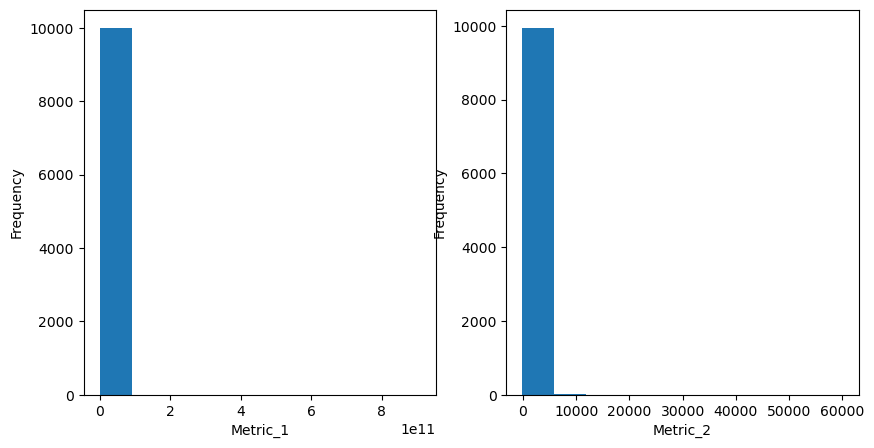

In [120]:
from scipy.stats import skew, kurtosis, shapiro

#Histograms of the two metrics
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(Var1, bins=10)
axes[0].set_xlabel('Metric_1')
axes[0].set_ylabel('Frequency')
axes[1].hist(Var2, bins=10)
axes[1].set_xlabel('Metric_2')
axes[1].set_ylabel('Frequency')
plt.show()

C:\Users\reshm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GOP_Year3', ylabel='Density'>

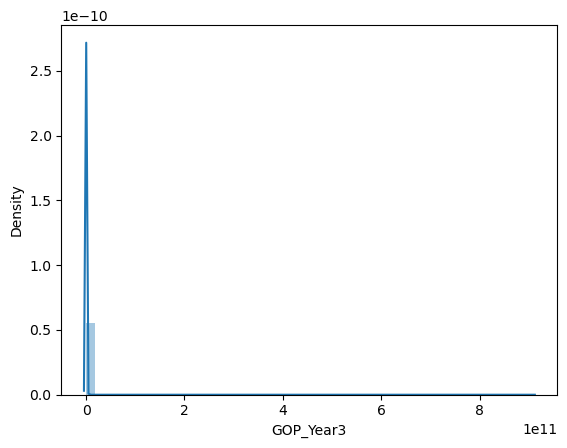

In [121]:
sns.distplot(Var1)

    The sample doesn't seem to be a homogenous one, as the distribution is highly skewed towards the right, there are few high output values that distort the sample. This is not normal distribution.

C:\Users\reshm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YoY_GOP', ylabel='Density'>

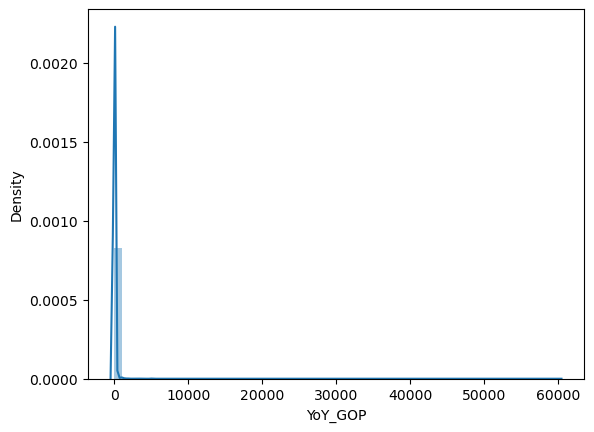

In [122]:
sns.distplot(Var2)

    The distribution of Year on Year Gross output is highly skewed to the right side. This variable is not normally distributed.

Text(0.5, 1.0, 'Probability Plot for Var2')

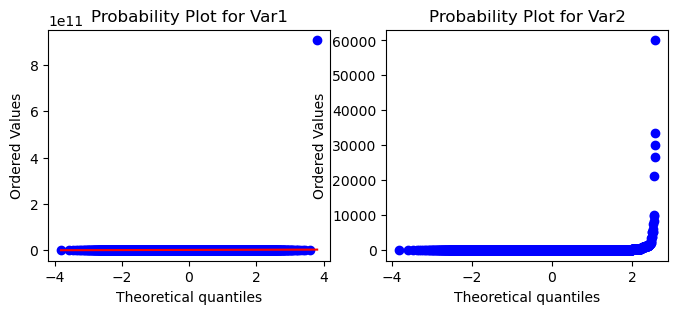

In [126]:
#Probability plots for the two metrics

fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(8,3))
stats.probplot(Var1, plot=axes[0])
axes[0].set_title('Probability Plot for Var1')
stats.probplot(Var2, plot=axes[1])
axes[1].set_title('Probability Plot for Var2')

In [136]:
#Anderson-Darling Test
from scipy.stats import anderson
output = anderson(Var1)
print(output)

AndersonResult(statistic=3859.6798412773387, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

    For 0.05 significance level, the A-D test critical value is 0.787, which is less than the statistic, 3859.67. Hence we reject the null hypothesis that the Gross output of Year 3 is normally distributed.